# Data Mining Group 3
## Members: Moritz Brandl, Lukas Miklautz, Raphael Mitsch


In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv

import pandas as pd
import numpy as np

#Visualisation Libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator
matplotlib.style.use('ggplot')
import seaborn as sns
from datetime import datetime
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

   
# import my method from the source code
%aimport data.download
from data.download import DatasetDownloader
%aimport visualization.visualize
from visualization.visualize import plot_track
from visualization.visualize import plot_gps_heatmap

%aimport data.preprocessing
from data.preprocessing import Preprocessor

# By loading the dotenv we can access Environment variables set int the dm_mobility_task/.env file
# e.g. I set there my token like this: "KEY_LUKAS"=1234, similary there is one for KEY_RAPHAEL and KEY_MORITZ
load_dotenv(find_dotenv())
DatasetDownloader.URL = str(os.environ.get("URL"))
DatasetDownloader.USERNAME = str(os.environ.get("LOGINNAME"))
DatasetDownloader.PASSWORD = str(os.environ.get("LOGINPASSWORD"))

In [2]:
recorded_file_names = DatasetDownloader.get_file_names(os.path.join(DatasetDownloader.get_data_dir(),"raw"))
print("We have recorded: {} trips".format(len(recorded_file_names)))

We have recorded: 61 trips


In [70]:
all_tokens = [os.environ.get("KEY_RAPHAEL"),
              os.environ.get("KEY_MORITZ"),
              os.environ.get("KEY_LUKAS")]

print("scripted trips:")
dfs = Preprocessor.preprocess([os.environ.get("KEY_MORITZ")])

scripted trips:
{'TRAM': 0, 'METRO': 2, 'WALK': 3}
Frame  0
sensor:  linacc
sensor:  gyroscope
sensor:  acceleration
sensor:  rotation
sensor:  magnetic
Frame  1
sensor:  linacc
sensor:  gyroscope


KeyboardInterrupt: 

Get summaries for each scripted trip:

In [61]:
token = os.environ.get("KEY_RAPHAEL")
trip_info = Preprocessor.get_trip_summaries(dfs[token]["trips"], convert_time=True)

scripted_mask = [True if "scripted" in str(notes).lower() else False for notes in trip_info["notes"]]
trip_info[scripted_mask]

,time,mode,notes,Start,Stop,trip_length
6,2017-12-05 16:46:55.136,TRAM,scripted,2017-12-05 16:46:55.635,2017-12-05 17:00:48.895,00:13:53.260000
7,2017-12-07 07:09:14.617,TRAM,scripted,2017-12-07 07:09:15.194,2017-12-07 07:26:03.936,00:16:48.742000
8,2017-12-07 10:25:09.021,TRAM,scripted,2017-12-07 10:25:09.721,2017-12-07 10:38:16.451,00:13:06.730000
9,2017-12-07 10:45:22.798,WALK,scripted,2017-12-07 10:45:24.227,2017-12-07 10:56:37.219,00:11:12.992000
10,2017-12-08 14:48:43.804,METRO,scripted,2017-12-08 14:48:44.143,2017-12-08 14:59:39.862,00:10:55.719000
11,2017-12-09 12:28:03.318,WALK,scripted,2017-12-09 12:28:03.589,2017-12-09 12:40:43.252,00:12:39.663000
12,2017-12-09 19:41:53.524,WALK,scripted,2017-12-09 19:41:53.848,2017-12-09 19:53:01.321,00:11:07.473000
13,2017-12-09 20:04:36.073,METRO,scripted,2017-12-09 20:04:36.335,2017-12-09 20:15:55.682,00:11:19.347000
14,2017-12-10 12:59:26.917,WALK,scripted,2017-12-10 12:59:27.245,2017-12-10 13:10:44.976,00:11:17.731000
15,2017-12-11 15:42:33.469,WALK,scripted,2017-12-11 15:42:34.507,2017-12-11 15:53:59.586,00:11:25.079000


In [68]:
from copy import deepcopy
i =0
acc_sensor = deepcopy(dfs[token]["resampled_sensor_data"][i]['sensor'])
acc_sensor = acc_sensor[acc_sensor['sensor'] == 'acceleration']

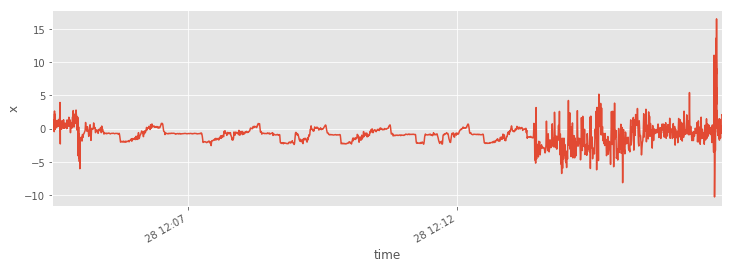

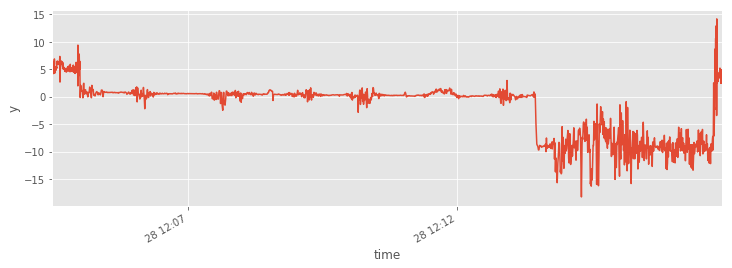

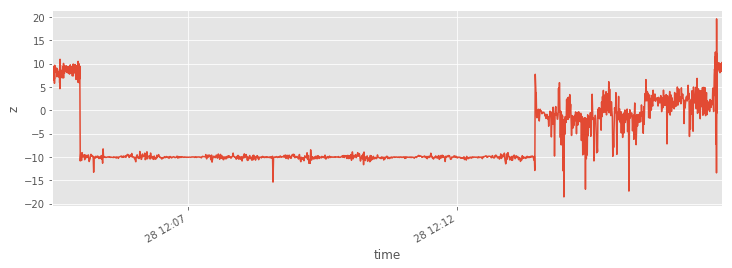

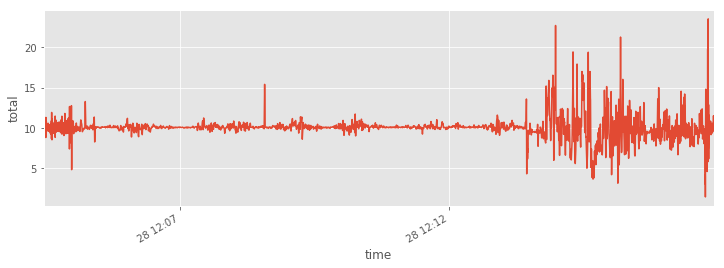

In [69]:
acc_sensor= acc_sensor.set_index("time")
figsize=(12, 4)
acc_sensor["x"].plot(figsize=figsize);
plt.ylabel("x")
plt.show();

acc_sensor["y"].plot(figsize=figsize);
plt.ylabel("y")
plt.show();

acc_sensor["z"].plot(figsize=figsize);
plt.ylabel("z")
plt.show();

acc_sensor["total"].plot(figsize=figsize);
plt.ylabel("total")
plt.show();

## Plot acceleration for one trip

In [10]:
trip_nr = 3
sensor_for_one_trip = dfs[token]["resampled_sensor_data"][trip_nr]
acceleration = sensor_for_one_trip[sensor_for_one_trip["sensor"] == "acceleration"]
acceleration= acceleration.set_index("time")
figsize=(12, 4)
acceleration["x"].plot(figsize=figsize);
plt.ylabel("x")
plt.show();

acceleration["y"].plot(figsize=figsize);
plt.ylabel("y")
plt.show();

acceleration["z"].plot(figsize=figsize);
plt.ylabel("z")
plt.show();

acceleration["total"].plot(figsize=figsize);
plt.ylabel("total")
plt.show();

TypeError: Could not compare ['acceleration'] with block values

## Plot the gps data on a google map and save it as html to disk:

In [6]:
trip1_lukas_uni = 1
location_df = dfs[token]["trips"][trip1_lukas_uni]["location"]
file_name = "gps_test.html"
plot_track(location_df[["longitude", "latitude"]], file_name)

The track can now be viewed at:


In [7]:
os.path.join("reports","maps",file_name)

'reports\\maps\\gps_test.html'

In [8]:
all_trips = []
for token in all_tokens:
    all_trips += dfs[token]["trips"]

file_name="heatmap.html"
plot_gps_heatmap(all_trips, file_name)

The heatmap can now be viewed at:

In [9]:
os.path.join("reports","maps",file_name)

'reports\\maps\\heatmap.html'